Lab | Customer Analysis Final Round
For this lab, we still keep using the marketing_customer_ana2lysis.csv file that you can find in the files_for_lab folder.

It's time to put it all together. Remember the previous rounds and follow the steps as shown in previous lectures.

01 - Problem (case study)
Data Description.
Goal.
02 - Getting Data
Read the .csv file.
03 - Cleaning/Wrangling/EDA
Change headers names.
Deal with NaN values.
Categorical Features.
Numerical Features.
Exploration.
04 - Processing Data
Dealing with outliers.
Normalization.
Encoding Categorical Data.
Splitting into train set and test set.
05 - Modeling
Apply model.
06 - Model Validation
R2.
MSE.
RMSE.
MAE.
07 - Reporting
Present results.

In [4]:
#Iniciamosimportando libreria pandas
import pandas as pd
df=pd.read_csv(r"C:\Users\marco\OneDrive\Desktop\ironhack\Laboratorios\files\marketing_customer_analysis (1).csv")
df=df.rename(columns={"Unnamed: 0":"Unnamed"})
# Para terminar de arreglar encabezados sustituyo espacios por _
df.columns = df.columns.str.replace(" ", "_")
numerical_vars=df.select_dtypes(include=["int64", "float64"])
categorical_vars=df.select_dtypes(exclude=["int64", "float64"])
#para hacer check de en q columnas hay na
# pd1.isna().count()-> no sirve xq te cuenta todo los true y false en cambio con el otro metodo te suma los true (1), los false cuentan 0
df.isna().sum()
#Deal with NaN:
# opcion1: sustituir na por cero: pd1=pd1.fillna(0)
# opcion2: Filtrando para que no me muestre las filas con na:
# pd1[pd1["Number_of_Open_Complaints"].notna()]
df=df.fillna(0)


correlaciones=numerical_vars.corr()
correlaciones
x = df.drop(columns="Customer_Lifetime_Value") # Cojo todo menos customer lifetime value
y = df["Customer_Lifetime_Value"] # Cojo solo customer lifetime value
from sklearn.preprocessing import MinMaxScaler #Has de importar esta libreria para normalizar
scaler=MinMaxScaler()
nomalized_df=scaler.fit_transform(df.select_dtypes(include=["int64", "float64"]))
response_code = pd.get_dummies(categorical_vars['Coverage'])  # los categoricos ya los definiste antes


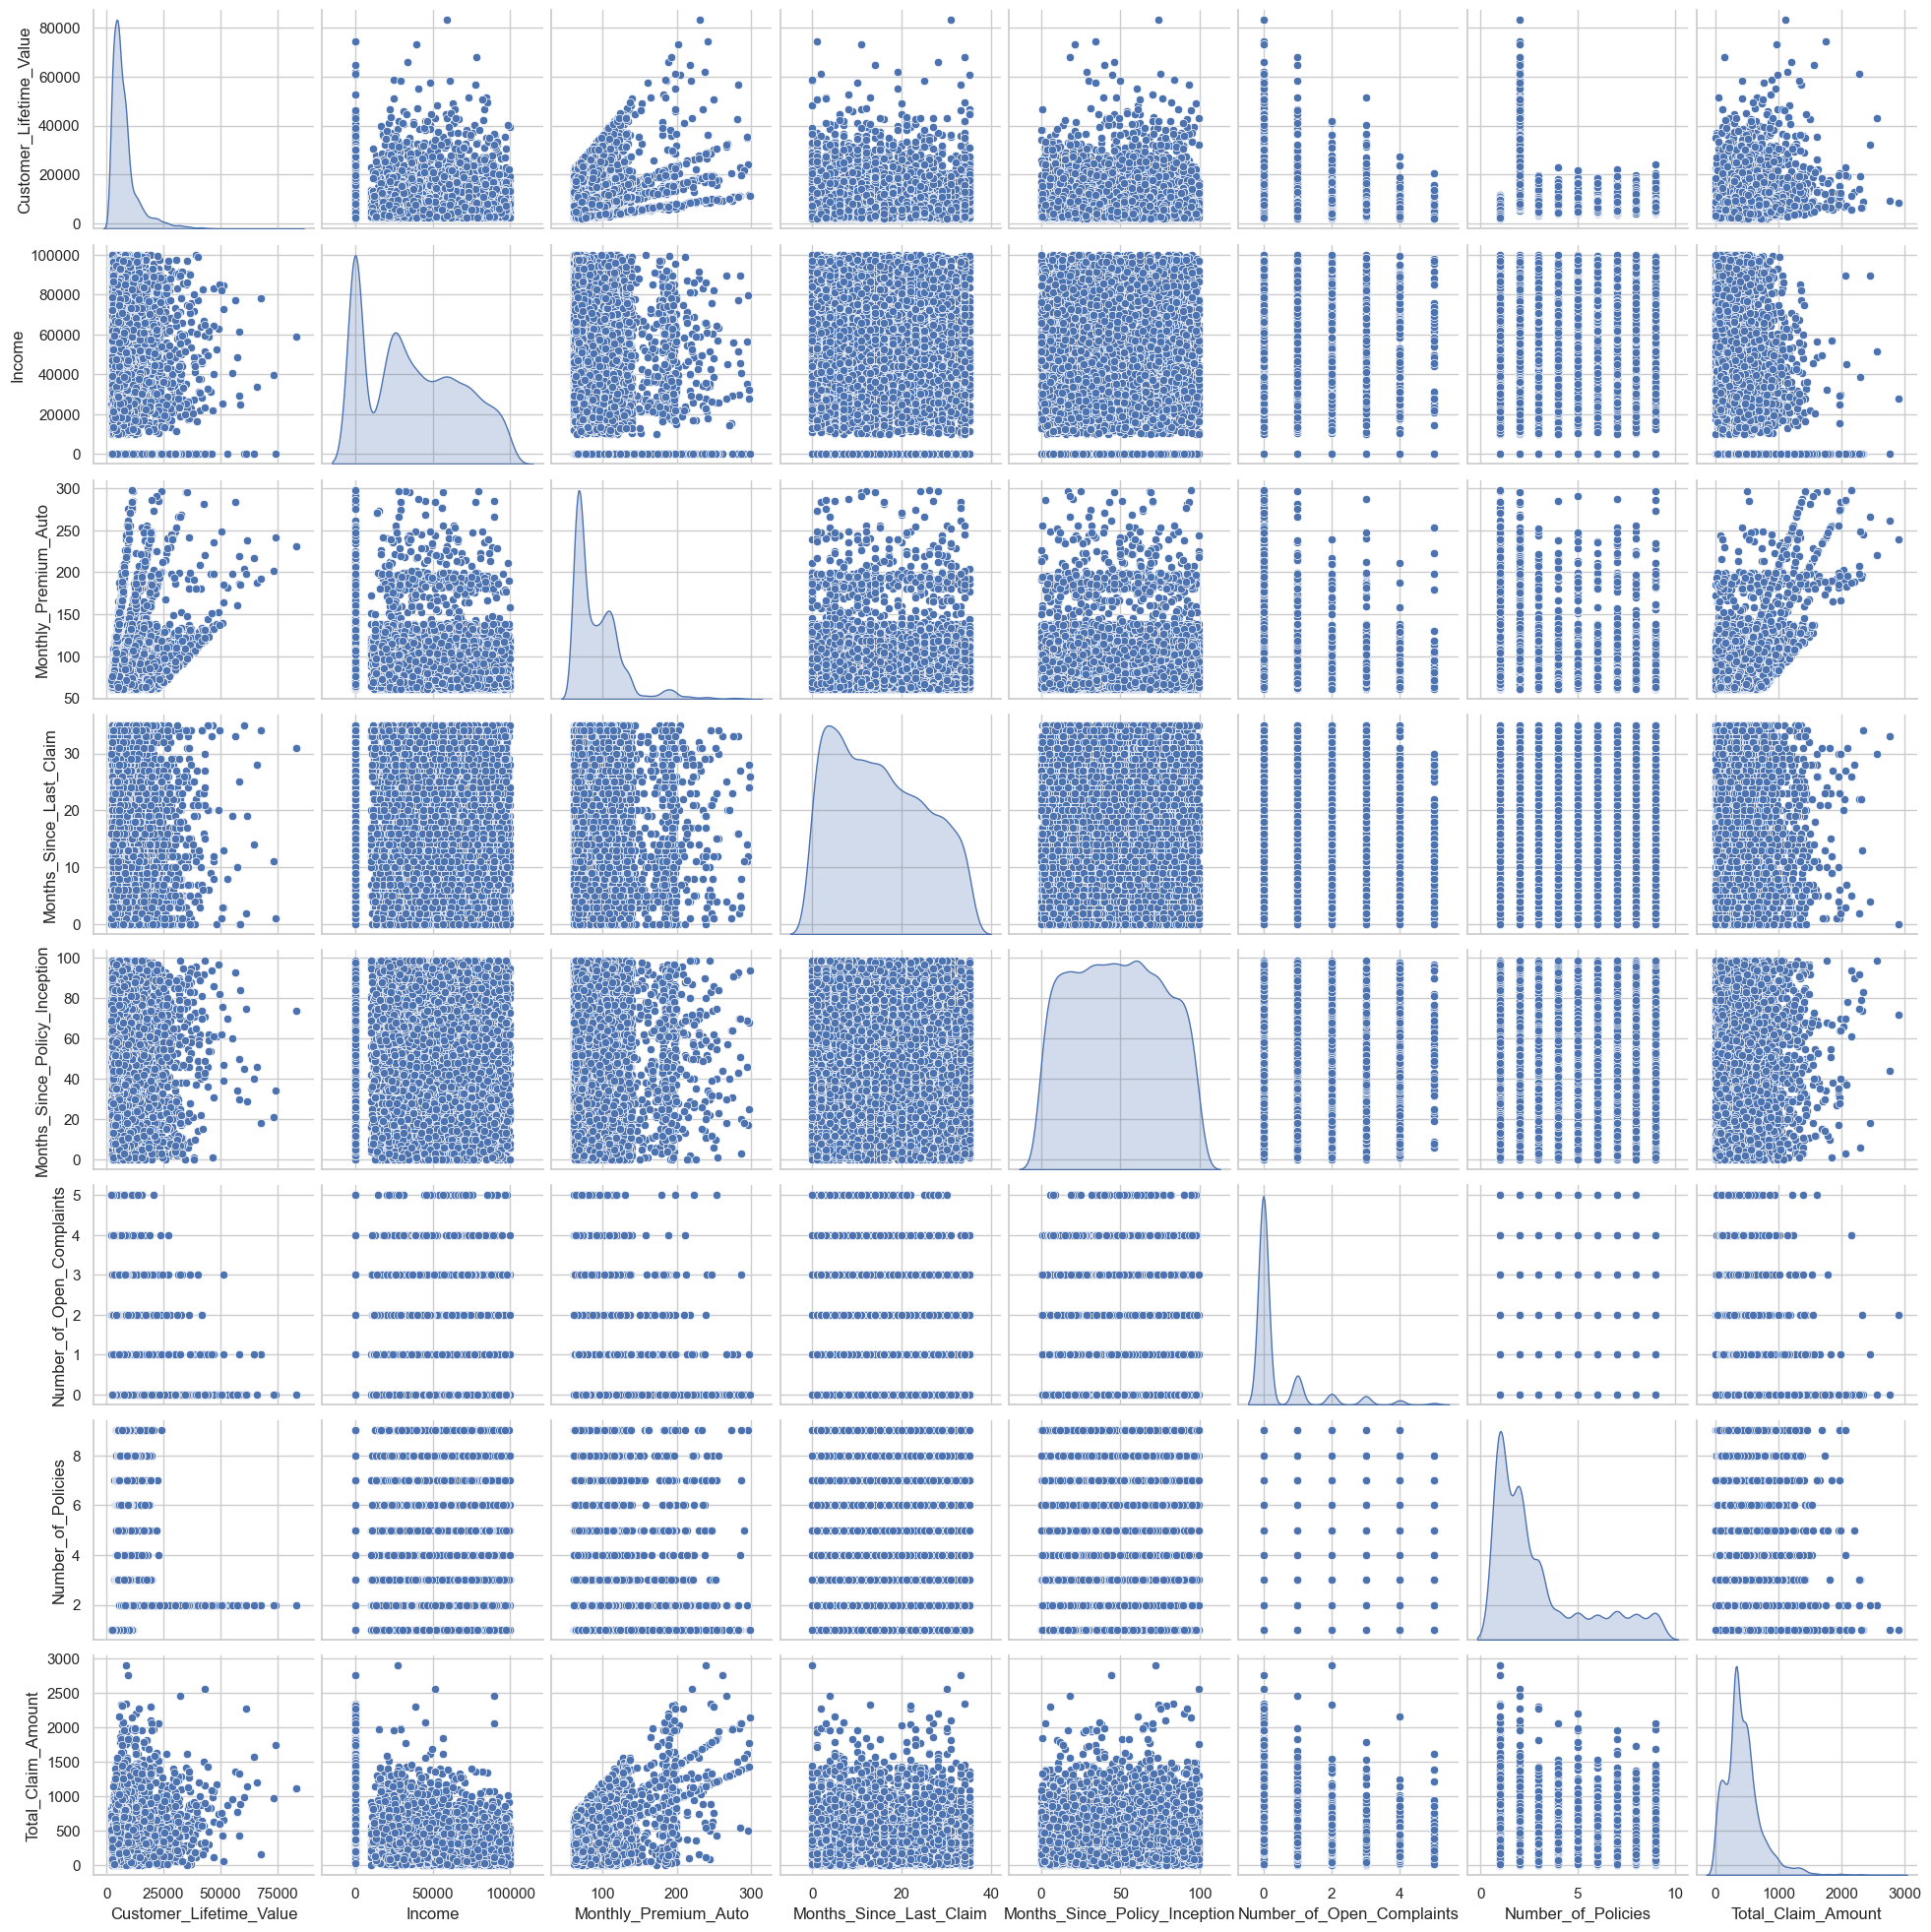

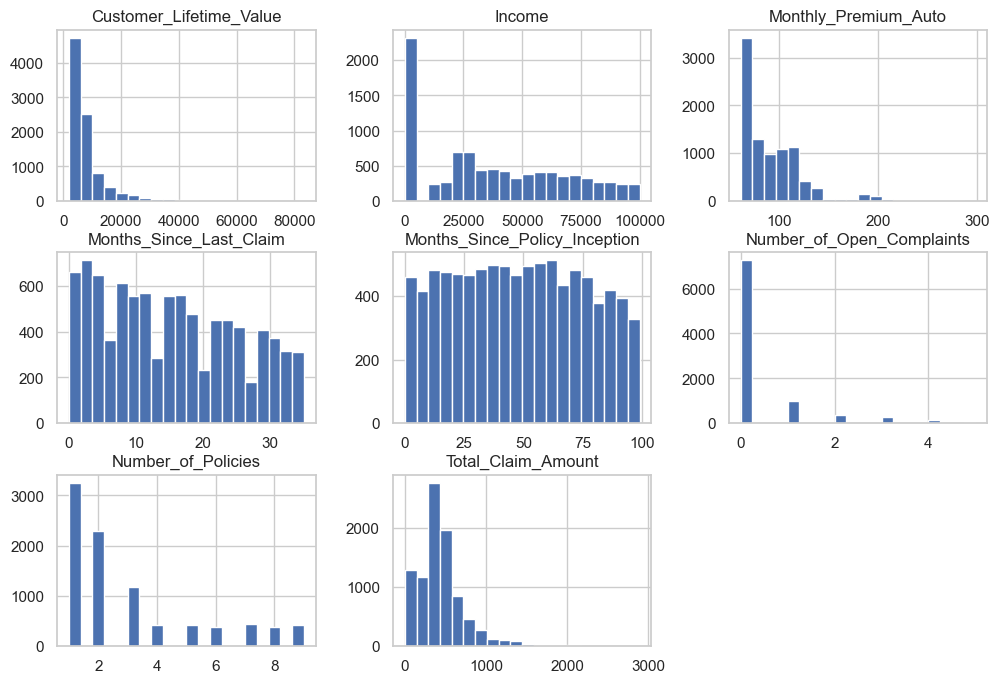

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear gráficos de distribución para las variables numéricas
sns.pairplot(numerical_vars, diag_kind='kde', kind='scatter')
plt.show()

# Crear histogramas para las variables numéricas
numerical_vars.hist(bins=20, figsize=(12, 8))
plt.show()

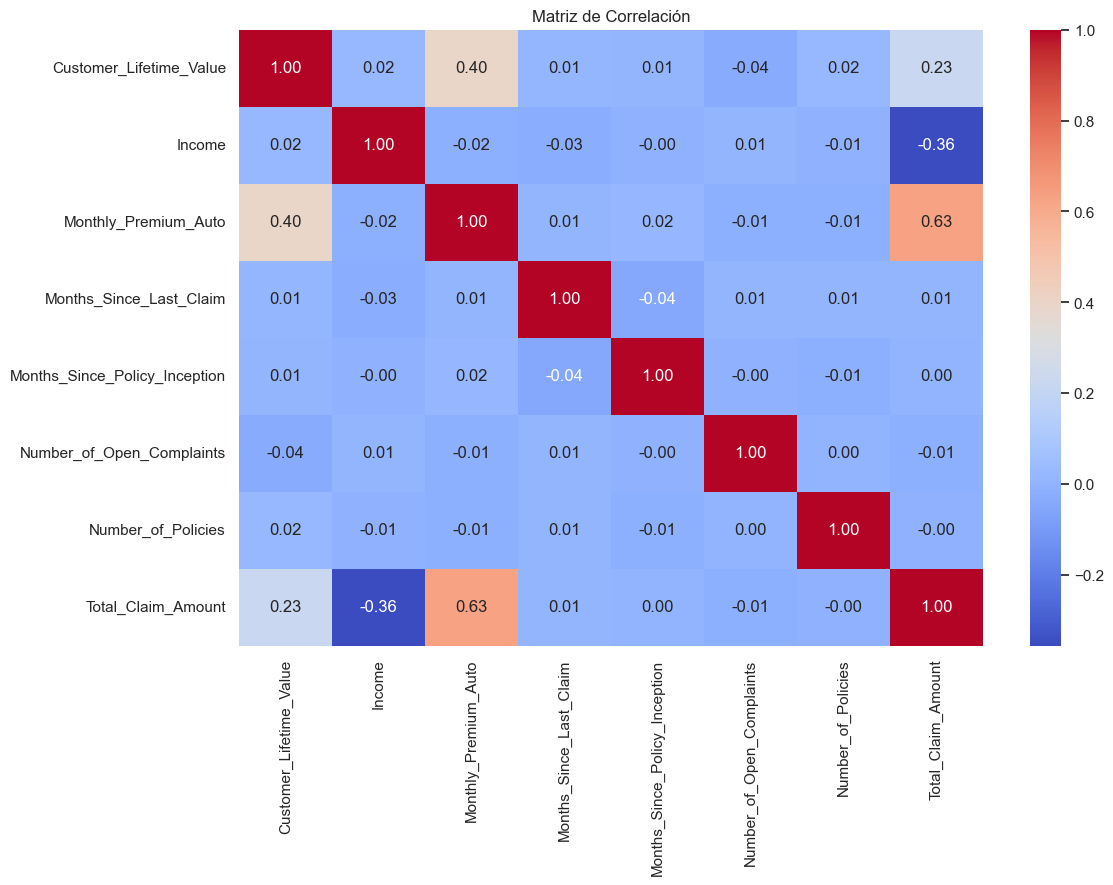

In [6]:
# Calcular la matriz de correlación
correlation_matrix = numerical_vars.corr()

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

In [7]:
x=x[["Income", "Monthly_Premium_Auto", "Months_Since_Last_Claim", "Months_Since_Policy_Inception", "Number_of_Open_Complaints", "Number_of_Policies", "Total_Claim_Amount"]]

In [9]:
# Ahora intentamos analizar colinearity con VIF:
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Añadir una columna constante al DataFrame para el término de intercepción
# x = add_constant(numericos)
# Calcular el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(7)]

# Imprimir el DataFrame con los resultados del VIF
print(vif_data)

                        Variable        VIF
0                         Income   2.829624
1           Monthly_Premium_Auto  12.406466
2        Months_Since_Last_Claim   2.784210
3  Months_Since_Policy_Inception   3.267690
4      Number_of_Open_Complaints   1.165267
5             Number_of_Policies   2.296918
6             Total_Claim_Amount   6.664016


In [10]:
x1=x[["Income", "Months_Since_Last_Claim", "Months_Since_Policy_Inception", "Number_of_Open_Complaints", "Number_of_Policies", "Total_Claim_Amount"]]

In [11]:
from sklearn.model_selection import train_test_split
# Problema: dentro de x hay vbles categoricas asi que vamos a definir x1 DF sin categoricos:
x1=x.select_dtypes(exclude=["object"])
# Dividir los datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%)
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=42)
# x (vble indep), y (vble dep)
#test_size (tamaño del conjunto d eprueba, ahora 20%)
#random_state(semilla para garantizar que la división sea reproducible. Puedes cambiar este valor o dejarlo en None.)
# Para entrenar el modelo:
from sklearn.linear_model import LinearRegression
# Paso 2: Instancia el modelo
modelo = LinearRegression()

# Paso 3: Entrena el modelo
modelo.fit(x1_train, y_train)

# Ahora el modelo ha sido entrenado en los datos de entrenamiento

coef_regresion=modelo.coef_[0] #corte en abcisas
pendiente=modelo.intercept_
y_pred = modelo.predict(x1)

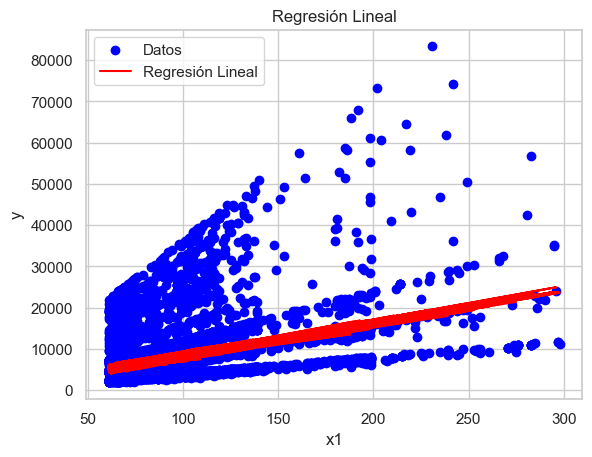

In [12]:
import matplotlib.pyplot as plt
# Scatter plot de los datos
plt.scatter(x1["Monthly_Premium_Auto"], y, color='blue', label='Datos')  

# Trazar la línea de regresión
plt.plot(x1["Monthly_Premium_Auto"], y_pred, color='red', label='Regresión Lineal')  

plt.xlabel('x1')  # Etiqueta del eje x
plt.ylabel('y')  # Etiqueta del eje y
plt.title('Regresión Lineal')  # Título del gráfico
plt.grid(True)  # Mostrar cuadrícula
plt.legend()  # Mostrar leyenda
plt.show()  # Mostrar gráfico

In [14]:
# 11. Model Validation. Description:
    # 11.1. R2:
from sklearn.metrics import r2_score

# Supongamos que tienes tus datos de predicción y de verdad
# y_pred = ...
# y_true = ...

# Calcular el R cuadrado
r_cuadrado = r2_score(y, y_pred)

print("R cuadrado del modelo:", r_cuadrado)
# El R cuadrado varía entre 0-1 (nula-total explicacion de la varibilidad). 
# R cuadrado no es una medida perfecta de la bondad del ajuste de un modelo. 
#Puede ser engañoso. Por lo tanto, es recomendable complementar el analisis con otras métricas de evaluación como:
#error cuadrático medio (MSE), error absoluto medio (MAE)para obtener una imagen más completa del rendimiento del modelo.

R cuadrado del modelo: 0.16004618789227099


In [15]:
# 11.2. MSE --> error cuadrático medio
from sklearn.metrics import mean_squared_error
# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y, y_pred)
print("Error cuadrático medio (MSE):", mse)

Error cuadrático medio (MSE): 39650042.59165002


In [16]:
import numpy as np
# 11.3. RMSE --> MRoot Mean Squared Error
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 6296.827978565876


In [17]:
from sklearn.metrics import mean_absolute_error
# 11.4. MAE --> Mean Absolut error
mae = mean_absolute_error(y, y_pred)
print("MAE:", mae)

MAE: 3905.17051077059


07 - Reporting Present results:

Primero hemos hecho una limpieza de datos, incluyendo tratamiento de NaNs, transformacion de nombre de columnas, eliminacion de duplicados y encoding de variables categoricas. 

Despues hemos hecho un analisis la distribucion a traves de histogramas y de graficos de distriibucion de variables numericas.

A continuación para el analisis de multicolinearidad, hemos obtenido la matriz de correlaciones de concluido que que las variables presentaban correlación baja y que no era preciso eliminar variables. Como analisis complementario, hemos analizado el VIF, en este caso si hemos apreciado variable con VIF> 5 (de 12), de lo que hemos concluido la necesidad de eliminar esa variable para evitar multicolinearidad en entre las variables independientes, aportando mayor robusted al modelo.

Sin embargo, no se observa un gran impacto a nivel grafico en la regresion lineal tras eliminar la variable antes mencionada. En cualquier caso, hemos ganado en eficiencia y simplicidad para la demanda ejecuional.

Respecto al evaluacion al modelo, hemos tenido en cuenta varios metodos de medición de error y destacamos R2 como principal metodo y del que se interpreta un error relativamente bajo y no proximo a cero, es decir que sera poco probable que haya un sobreajuste.